In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.duplicated().sum()

0

In [4]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df = pd.get_dummies(df, columns = ['Geography','Gender'], drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [9]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [19]:
X_train.shape

(8000, 11)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [24]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
# call karvathi model banse

model = Sequential()

In [27]:
# Dense layer create karse  (input layer)



model.add(Dense(11,activation='relu' ,input_dim = 11))  #  3 = node,   activation = 'sigmoid'  sigmoid formula chhe,  input_dim = 11       11 columns chhe
model.add(Dense(11,activation='relu'))
model.add(Dense(1, activation='sigmoid'))   


# nuron network architecture ready

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])  # optimizer = gradient descent mate use thay

In [30]:
history = model.fit(X_train_scaled,y_train , epochs = 10, validation_split=0.2)  # epochs = 10 var run thase   loop ni jem farse




# validation_split = 8000 row mathi 20% data alage karse   model have 6400 data par run karse sathe 1600 data result karse aenu accuracy score ketlo aavse sathe bathavse

#  aanathi weight and bias calculate thai jase


# train  and variance data baneni accuracy vadhvi joiae

# train data accuracy vadhse  and variance data ni accuracy na vadhe to overfitting thase

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5671 - accuracy: 0.7173 - val_loss: 0.4697 - val_accuracy: 0.8006
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7984 - val_loss: 0.4405 - val_accuracy: 0.8025
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8048 - val_loss: 0.4230 - val_accuracy: 0.8125
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8217 - val_loss: 0.4084 - val_accuracy: 0.8213
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3997 - accuracy: 0.8309 - val_loss: 0.3919 - val_accuracy: 0.8325
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8395 - val_loss: 0.3792 - val_accuracy: 0.8388
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8450 - val_loss: 0.3691 - val_accuracy: 0.8506
Epoch 

In [31]:
# input columns thi node sudhina weight and bias kai jagya ae store chhe    

# layers


model.layers[0].get_weights()

[array([[-7.6840911e-04,  3.5763912e-02, -5.9111949e-02,  3.8967032e-02,
         -2.0118000e-01, -9.5087690e-03, -1.1484411e-02, -6.0948841e-02,
         -1.4781700e-01,  3.3995974e-01, -2.9937625e-02],
        [-6.5081966e-01,  2.6300168e-01,  3.4929851e-01,  6.0679406e-01,
         -1.9600278e-01,  1.2489123e-02, -5.3385264e-01, -5.2920854e-01,
         -3.8982716e-01,  1.8937437e-01,  1.0608523e-01],
        [ 1.0870184e-01,  2.8243610e-01, -1.5232789e-03, -1.3465598e-01,
          4.3198368e-01,  2.6285434e-01,  2.6410538e-01, -4.6221349e-01,
          2.4429964e-01, -1.4754514e-01, -7.1998732e-03],
        [-3.1024885e-01,  8.3618201e-02, -4.4596997e-01, -6.9932126e-02,
         -6.3514704e-01, -1.1073268e-01, -2.4022064e-01,  3.2284316e-01,
          1.4323913e-01, -3.6443844e-01,  2.1508478e-01],
        [-1.5315835e-02, -1.7077112e-01, -8.6766243e-01, -9.1682948e-02,
          1.6803588e-01,  4.7327125e-01, -8.0702476e-02,  2.6831871e-01,
          1.3634317e-01,  1.0295327e-0

In [32]:
model.layers[1].get_weights()

[array([[ 0.2184513 ,  0.6152407 , -0.07574707, -0.11412258,  0.21533003,
         -0.60394627,  0.06899177, -0.00559945, -0.05416931,  0.30743283,
          0.282374  ],
        [ 0.38103175, -0.37788948,  0.2207378 ,  0.33507285, -0.42571747,
         -0.10544184,  0.19541617,  0.16642417, -0.5270766 , -0.12166707,
          0.1521522 ],
        [ 0.6969869 , -0.54155546, -0.41240257, -0.41141206, -0.11350895,
          0.02480075, -0.26739988,  0.67770535, -0.43150398, -0.6699904 ,
         -0.0735093 ],
        [-0.07594654,  0.06981726,  0.6825951 ,  0.07297142,  0.19019105,
         -0.41874096,  0.53970855,  0.2589043 , -0.15160687, -0.08306132,
          0.45774716],
        [ 0.38276458,  0.4885864 ,  0.21720688,  0.37705997, -0.35573062,
          0.28859383, -0.24024762, -0.05334428,  0.09131813,  0.22346407,
          0.03628618],
        [ 0.55516005, -0.15056616,  0.07291783, -0.1787636 , -0.30782902,
          0.38127774, -0.18370758,  0.28526935,  0.10897016,  0.1428131

In [33]:
# node thi output sudhina weight and bias kai jagya ae store chhe

model.layers[2].get_weights()

[array([[ 0.25469682],
        [-0.5209037 ],
        [-0.39868087],
        [-0.7862711 ],
        [ 0.75038785],
        [ 0.70468754],
        [-0.5049887 ],
        [ 0.2834246 ],
        [ 0.20876278],
        [-0.90204895],
        [ 0.03524168]], dtype=float32),
 array([-0.03897589], dtype=float32)]

In [34]:
y_log = model.predict(X_test_scaled)
y_log

63/63 [==============================] - 0s 1ms/step


array([[0.01886728],
       [0.11970382],
       [0.07190639],
       ...,
       [0.01210336],
       [0.03613504],
       [0.39870322]], dtype=float32)

In [35]:
# y_log ni value ma 0.5 thi moti value hase aene 1 kese and 0.5 thi nani value hase to 0 kese

y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.8575

In [38]:
import matplotlib.pyplot as plt

In [39]:
# history is a object

history

In [40]:
history.history

{'loss': [0.5670660138130188,
  0.4522113502025604,
  0.4287310838699341,
  0.4139412045478821,
  0.39966148138046265,
  0.3848588466644287,
  0.3730645477771759,
  0.36465388536453247,
  0.3594909906387329,
  0.35529136657714844],
 'accuracy': [0.7173437476158142,
  0.7984374761581421,
  0.8048437237739563,
  0.8217187523841858,
  0.8309375047683716,
  0.8395312428474426,
  0.8450000286102295,
  0.8525000214576721,
  0.8520312309265137,
  0.8551562428474426],
 'val_loss': [0.4697306156158447,
  0.44049155712127686,
  0.42296427488327026,
  0.4083837866783142,
  0.3919268846511841,
  0.3792429268360138,
  0.3690706193447113,
  0.36183059215545654,
  0.358093798160553,
  0.3555675446987152],
 'val_accuracy': [0.8006250262260437,
  0.8025000095367432,
  0.8125,
  0.8212500214576721,
  0.8324999809265137,
  0.8387500047683716,
  0.8506249785423279,
  0.8543750047683716,
  0.8518750071525574,
  0.8575000166893005]}

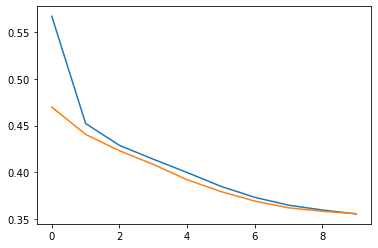

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# last ma bane line plot ni vachhe gap ne overfitting kevay

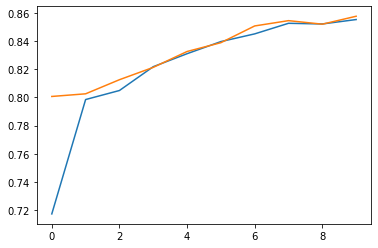

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])